Dla porównywania średniej metodą warianji:
-sprawdzamy, czy cecha jest mierzalna, czyli, czy można jej przypisac wartość liczbową, któa ma znaczenie. TAK
-sprawdzamy, czy zmienne są zależne. Np. czy zostały wykonane na tej samej grupie i po jakimś treningu. NIE
-sprawdzamy, czy próby są równoliczne TAK-ANOVA NIE-Kruskala_Wallisa
-czy próba podlega rozkładowi normalnemu: H0: Wszystkie podlegają H1: Chociaż jedna nie podlega H0->ANOVA H1->Kruskalla_Wallisa
-czy wariancje w próbach są jednakowe? H0: wariancje we wszystkich próbach są jednakowe H1: Przynajmniej jedna wariancja różni sie od reszty H0->ANOVA H1->Welch
-Przeprowadzamy test(ANOVA, WELCH->różne wariancje, WALLIS->nierówne próbki, brak rozkładu normalnego)
-Przeprowadzamy testy Post-Hoc i interpretujemy wyniki.

In [120]:
# bliblioteki
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import kruskal
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
from pingouin import welch_anova
from pingouin import pairwise_gameshowell
import numpy as np
import matplotlib.pyplot as plt

#Tu wstaw dane
data = [[1, 5, 7], [4, 8, 3], [2, 5, 3], [1, 4, 5]]
alpha = 0.05
dane = pd.DataFrame(data)
dane.columns =['A','B','C']

daneA = pd.DataFrame({'dane':dane['A'],'grupa': np.repeat(['A'], repeats=len(dane['A']))})
daneB = pd.DataFrame({'dane':dane['B'],'grupa': np.repeat(['B'], repeats=len(dane['B']))})
daneC = pd.DataFrame({'dane':dane['C'],'grupa': np.repeat(['C'], repeats=len(dane['C']))})

dane_z_opisami = daneA
dane_z_opisami = dane_z_opisami.append(daneB)
dane_z_opisami = dane_z_opisami.append(daneC)


C:\Users\jakub\AppData\Local\Temp\ipykernel_9132\1337407548.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dane_z_opisami = dane_z_opisami.append(daneB)
C:\Users\jakub\AppData\Local\Temp\ipykernel_9132\1337407548.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dane_z_opisami = dane_z_opisami.append(daneC)


Testy normalności:
H0: Wszystkie próby pochodzą z populacji o rozkładzie normalnym
H1: Nie wszystkie próby pochodzą z populacji o rozkładzie normalnym

In [121]:
# Testy normalności

data = dane['A']
stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('próba pochodzi z populacji o rozkładzie normalnym\n') 
else: print('próba nie pochodzi z populacji o rozkładzie normalnym\n')

data = dane['B']
stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('próba pochodzi z populacji o rozkładzie normalnym\n') 
else: print('próba nie pochodzi z populacji o rozkładzie normalnym\n')

data = dane['C']
stat, p =shapiro(data)
print(['Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p)]) 
if p>0.05: print('próba pochodzi z populacji o rozkładzie normalnym\n') 
else: print('próba nie pochodzi z populacji o rozkładzie normalnym\n')

['Shapiro-Wilk Test: stat=0.827, p=0.161190']
próba pochodzi z populacji orozkładzie normalnym

['Shapiro-Wilk Test: stat=0.840, p=0.194534']
próba pochodzi z populacji orozkładzie normalnym

['Shapiro-Wilk Test: stat=0.863, p=0.272453']
próba pochodzi z populacji orozkładzie normalnym



Wniosek dla rozkładu normalnego:

Testy wariancji:
H0: próby posiadają jednakowe wariancje
H1: Nie wszystkie próby posiadają jednakowe wariancje

In [122]:
# Testy wariancji
bartlett(dane['A'], dane['B'], dane['C'])

BartlettResult(statistic=0.23927250724177998, pvalue=0.8872431094965418)

Wniosek dla równości wariancji:

In [123]:
# TEST ANOVA, gdy wszystkie założenia są spełnione
f, p = f_oneway(dane['A'], dane['B'], dane['C'])
print('Statystyka f: stat=%.3f, wartość: p=%3f' %(f, p))

Statystyka f: stat=4.500, wartość: p=0.044194


Interpretacja dla ANOVY:

In [124]:
# TEST WELCHA, gdy wariancje nie są równe

welch_anova(data=dane_z_opisami, dv='dane', between='grupa')

,Source,ddof1,ddof2,F,p-unc,np2
0,grupa,2,5.899806,4.849299,0.05681,0.5


Interpretacja dla Welcha:

In [125]:
# TEST KRUSKALA, gdy 
kruskal(dane['A'], dane['B'], dane['C'])

KruskalResult(statistic=5.9435483870967785, pvalue=0.051212369027310294)

Interpretacja dla Kruskala:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B      3.5 0.0415  0.1444 6.8556   True
     A      C      2.5 0.1491 -0.8556 5.8556  False
     B      C     -1.0 0.6936 -4.3556 2.3556  False
---------------------------------------------------


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,2.0,5.5,-3.5,1.118034,-3.130495,5.769231,0.048449,-1.924865
1,A,C,2.0,4.5,-2.5,1.190238,-2.100420,5.522293,0.176216,-1.291497
2,B,C,5.5,4.5,1.0,1.290994,0.774597,5.940594,0.731110,0.476280


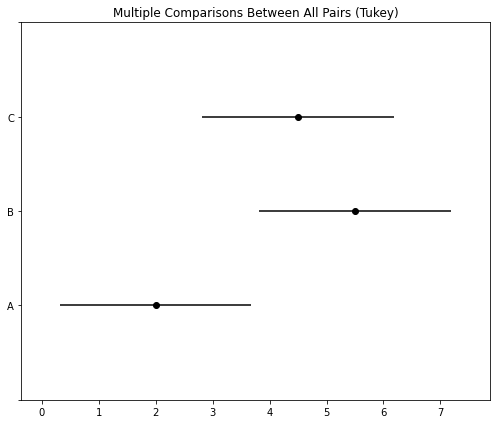

In [126]:
# Testy Post Hoc i Wykresy dla przejrzystości
tukey = pairwise_tukeyhsd(endog=dane_z_opisami['dane'], groups=dane_z_opisami['grupa'], alpha=alpha)
print(tukey)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
tukey.plot_simultaneous(ax=ax,figsize=(7, 6)) 
fig.tight_layout()

pairwise_gameshowell(dv='dane', between='grupa', data=dane_z_opisami)

Ostateczna interpretacja: